<a href="https://colab.research.google.com/github/vansika1310/OIBSIP/blob/main/Oasis_Infobyte_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasis Infobyte Internship,March P1**

**Vansika Singh,Data Science Intern**

**Iris Flower Classification ML Project:**

*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


*Import Dataset*

In [2]:
iris_df=pd.read_csv("/content/sample_data/iris.csv")

In [3]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
print("the unique number of values in the dataset species:",iris_df["Species"].nunique())
print("the unique number of values in the dataset species:",iris_df["Species"].unique())

the unique number of values in the dataset species: 3
the unique number of values in the dataset species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


*There are 3 species in the dataset that is "Iris-setosa","Iris-versicolor","Iris-virginica"*

**Exploratory Data Analysis**

*Data Visualization*

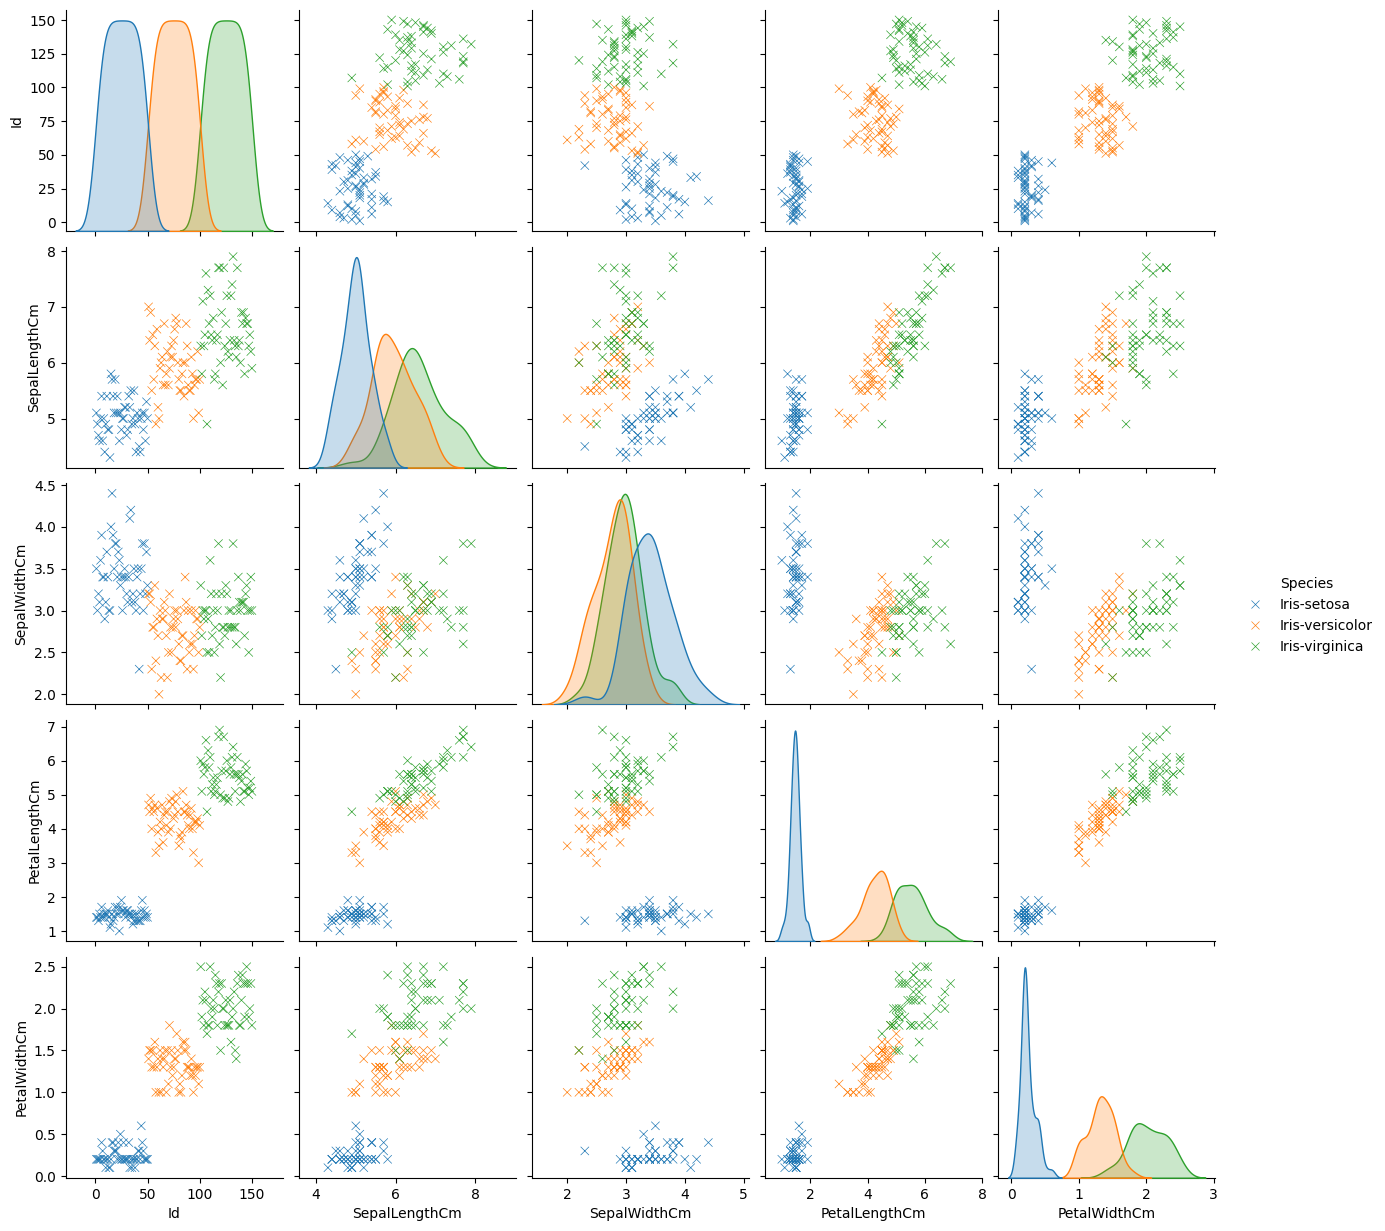

In [11]:
sns.pairplot(iris_df,hue = "Species",markers="x")
plt.show()

*It shows that iris-setosa is seperated from both other species in all features*

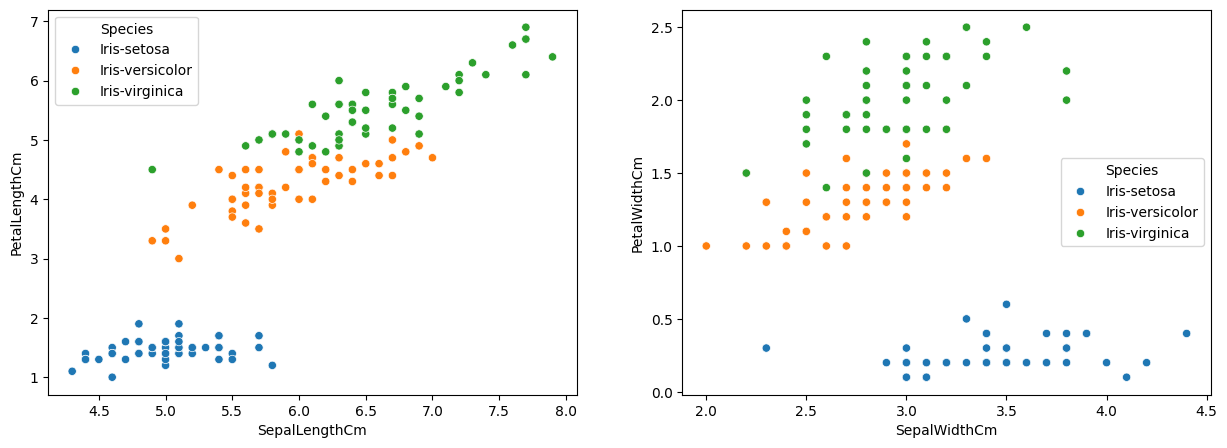

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df,hue='Species')

plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')

plt.show()

In [13]:
#Check correlation in dataset
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


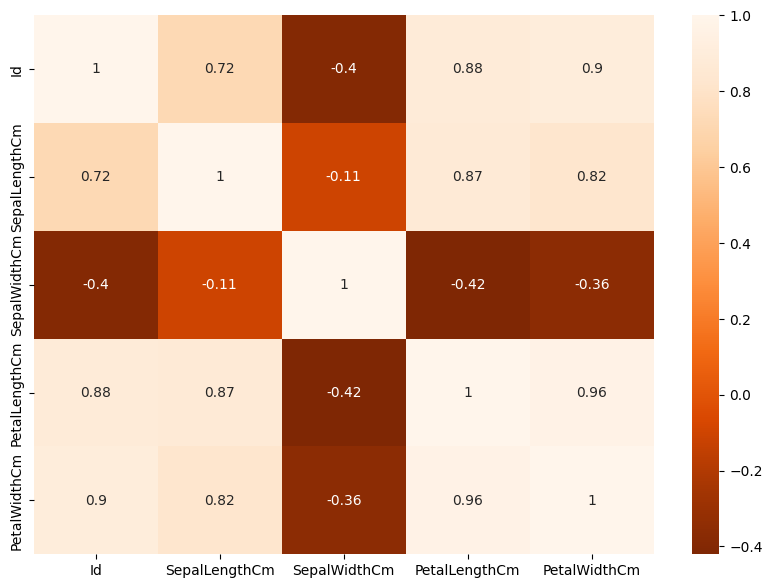

In [17]:
#use heatmap to see correlation

plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot = True,cmap="Oranges_r")
plt.show()

*In the above heatmap we see petal length and petal width is highly correlated*

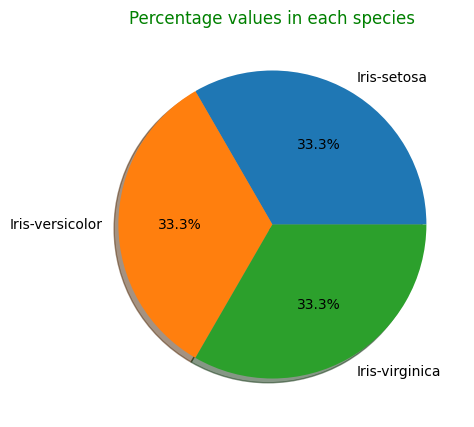

In [18]:
iris_df["Species"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,figsize=(5,5))
plt.title("Percentage values in each species",fontsize=12, c="g")
plt.ylabel("",fontsize=10,c="r")
plt.show()



*   We can see all species has equal values in dataset
*   Iris-setosa:50

*   Iris-Versicolor:50
*   Iris-Virginica:50







**Scatterplot for Sepal Length and Sepal Width**

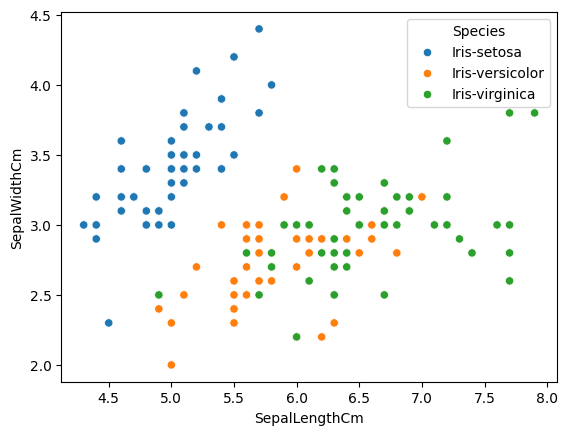

In [31]:
sns.scatterplot(x=iris_df['SepalLengthCm'],y= iris_df['SepalWidthCm'], hue= iris_df['Species'])

plt.show()


**Scatterplot for Petal Length and Petal Width**

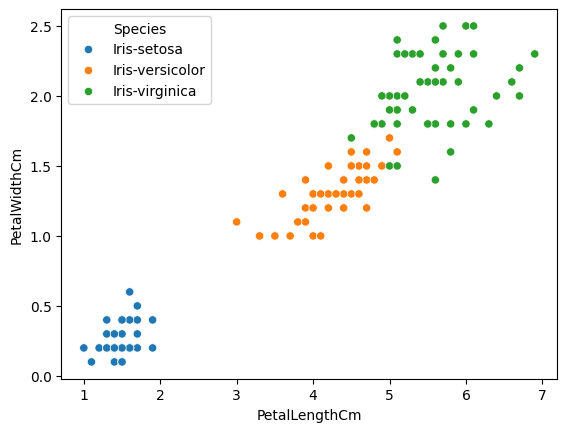

In [33]:
sns.scatterplot(x= iris_df['PetalLengthCm'],y= iris_df['PetalWidthCm'],hue= iris_df["Species"])
plt.show()

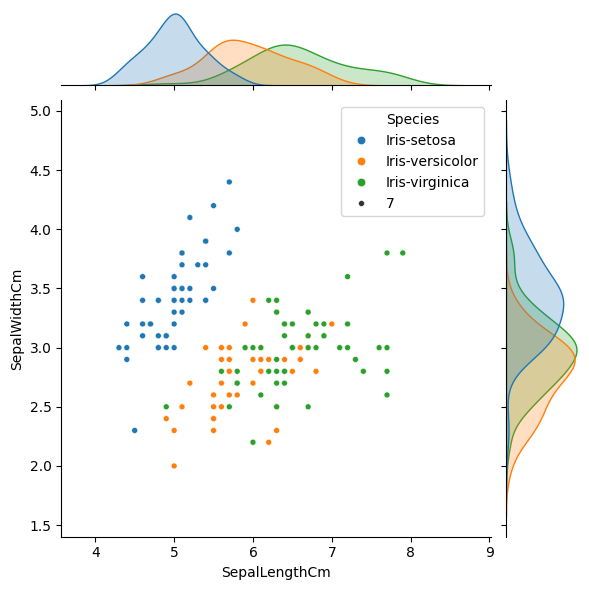

In [34]:
sns.jointplot(data = iris_df,x= 'SepalLengthCm',y= 'SepalWidthCm',size = 7, hue = "Species")
plt.show()

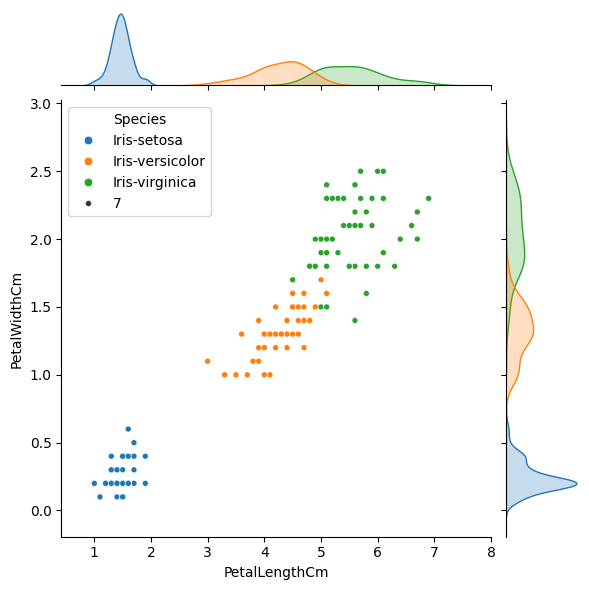

In [35]:
sns.jointplot(data =iris_df,x='PetalLengthCm',y='PetalWidthCm',size=7,hue="Species")
plt.show()

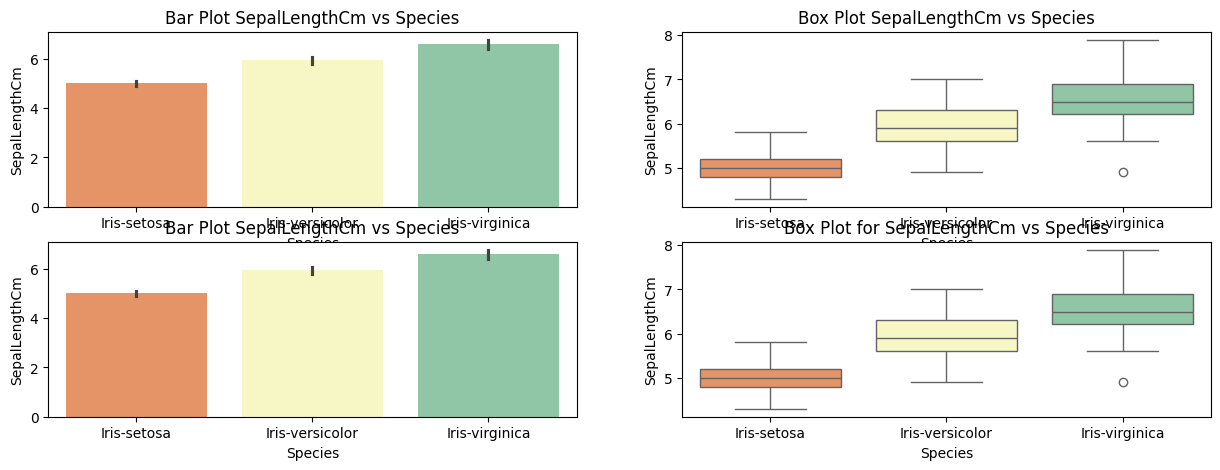

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df,palette=("Spectral"))
plt.title("Bar Plot SepalLengthCm vs Species")

plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data= iris_df,palette=("Spectral"))
plt.title("Box Plot SepalLengthCm vs Species")

plt.subplot(2,2,3)
sns.barplot(x = "Species", y = "SepalLengthCm", data = iris_df,palette=("Spectral"))
plt.title("Bar Plot SepalLengthCm vs Species")

plt.subplot(2,2,4)
sns.boxplot(x= "Species",y = "SepalLengthCm",data= iris_df,palette=("Spectral"))
plt.title("Box Plot for SepalLengthCm vs Species")

plt.show()

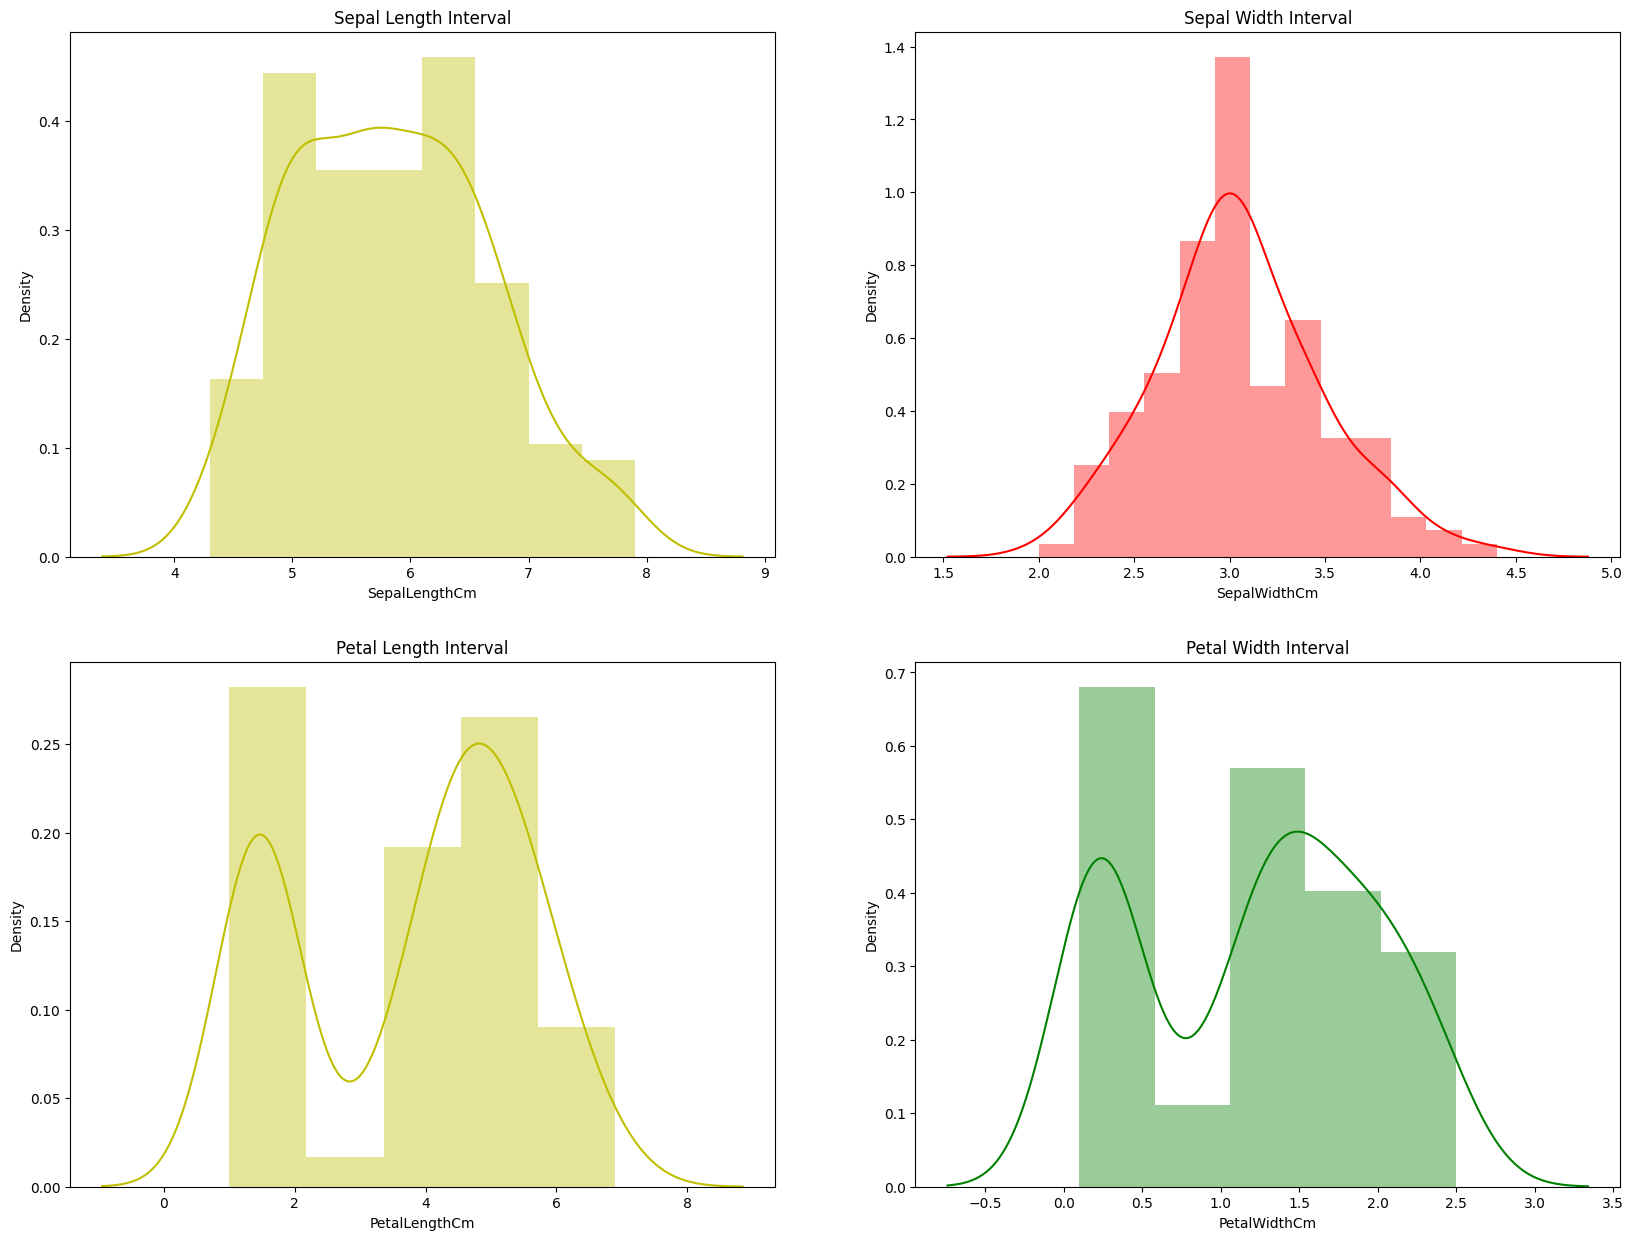

In [41]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(iris_df["SepalLengthCm"],color="y").set_title("Sepal Length Interval")

plt.subplot(2,2,2)
sns.distplot(iris_df["SepalWidthCm"],color="r").set_title("Sepal Width Interval")

plt.subplot(2,2,3)
sns.distplot(iris_df["PetalLengthCm"],color="y").set_title("Petal Length Interval")

plt.subplot(2,2,4)
sns.distplot(iris_df["PetalWidthCm"],color="g").set_title("Petal Width Interval")

plt.show()

**Data Cleaning**

In [42]:
#Change Categorical data into numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

iris_df["Species"]=le.fit_transform(iris_df["Species"])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [43]:
iris_df["Species"].unique()

array([0, 1, 2])

In [44]:
X=iris_df.iloc[:,[0,1,2,3]]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [45]:
y=iris_df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [46]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


**Model Building**

**Supervised Machine Learning**

**Split data into Training and Testing Set**

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(X_train,y_train)
print("Logistic Regression Successfully Implemented")

y_pred= lr.predict(X_test)


Logistic Regression Successfully Implemented


In [54]:
#confusion mtrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:",cm)

accuracy=accuracy_score(y_test,y_pred)

print("accuracy is:",accuracy*100)

print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix: [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

rfc.fit(X_train,y_train)
print("Random Forest Classifier Successfully Implemented")

y_pred=rfc.predict(X_test)




Random Forest Classifier Successfully Implemented


In [58]:
#confusion matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",cm)

Confusion Matrix: [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [59]:
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy*100)

print("Classiifcation Report:")
print(classification_report(y_test,y_pred))

accuracy: 100.0
Classiifcation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

